In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [87]:
test_df = pd.read_csv('titanic-test.csv')
train_df = pd.read_csv('titanic-train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


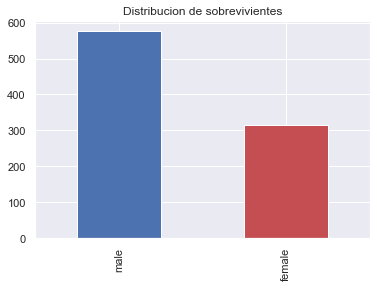

In [89]:
train_df.Sex.value_counts().plot(kind = 'bar', color = ['b', 'r'])
plt.title('Distribucion de sobrevivientes')
plt.show()

In [103]:
train_df.Sex.value_counts()[0],train_df[(train_df.Survived == 1)].Sex.value_counts()[1]

(577, 109)

In [102]:
train_df.Survived.value_counts()[0]   #Buscar valor en una sola columna

549

In [95]:
train_df[(train_df.Survived == 1)].Sex.value_counts()#[0]     #Buscar Valor cuando hay dos columnas de pormedio

female    233
male      109
Name: Sex, dtype: int64

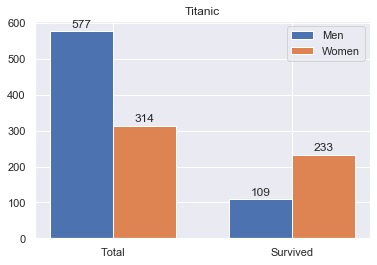

In [90]:
labels = ['Total', 'Survived']
men_means = [train_df.Sex.value_counts()[0],train_df[(train_df.Survived == 1)].Sex.value_counts()[1]]
women_means = [train_df.Sex.value_counts()[1],train_df[(train_df.Survived == 1)].Sex.value_counts()[0]]

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

ax.set_title('Titanic')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()